In [ ]:
K-means clustering from Scratch plan

1. Get data
2. Make sure data is cleaned (e. g. NAs)
3. Same scale (Data scaling -> MinMax, Standard)
4. Choose K
5. Sample K random points (Centroids)
6. For each data point, assign to the closest centroid
7. For each cluster, move the centroid to the average point
8. Check for converge:
    if converged: break
    else: Go to 6
9. Evaluate the model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler

In [ ]:
K = 3

In [2]:
def generate_data(n_samples=400, centers=4, cluster_std=1.0, seed=509):
    """
    Uses make_blobs to create n_samples in 2D, 
    with visually distinct clusters.
    """
    X, _ = make_blobs(n_samples=n_samples,
                      centers=centers,
                      cluster_std=cluster_std,
                      random_state=seed)
    return X


In [5]:
data = generate_data(cluster_std=.5)

min_max_scaler = MinMaxScaler()

data = min_max_scaler.fit_transform(data)

data

array([[0.5114017 , 0.09937101],
       [0.46621298, 0.80425669],
       [0.50783413, 0.40151351],
       [0.43168129, 0.91071684],
       [0.16225129, 0.15655915],
       [0.36000016, 0.16194236],
       [0.21134457, 0.49907171],
       [0.19811401, 0.13839535],
       [0.45145844, 0.88862362],
       [0.70528198, 0.3567957 ],
       [0.23590641, 0.12303541],
       [0.21532665, 0.0901212 ],
       [0.31409722, 0.88949248],
       [0.405895  , 0.1266105 ],
       [0.59678559, 0.29865724],
       [0.49971506, 0.84828958],
       [0.55737365, 0.39475687],
       [0.40480444, 0.52158506],
       [0.53110635, 0.50752643],
       [0.69498855, 0.86015688],
       [0.67476651, 0.31321052],
       [0.35890433, 0.49155619],
       [0.40517566, 0.90449632],
       [0.28412596, 0.14775978],
       [0.52858071, 0.57152372],
       [0.54196304, 0.87572663],
       [0.71836301, 0.89722412],
       [0.39245624, 0.83453512],
       [0.71321459, 0.84184665],
       [0.67594179, 0.88294846],
       [0.

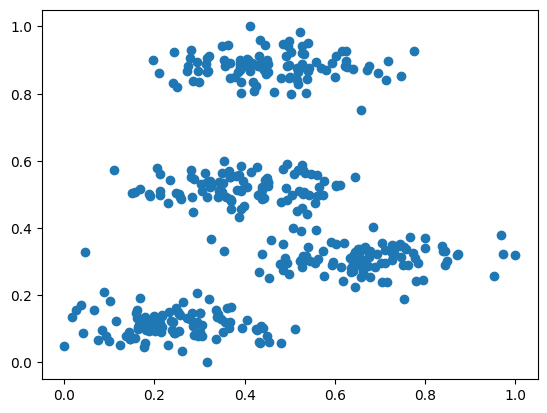

In [6]:
x1 = data[:, 0]
x2 = data[:, 1]

plt.scatter(x1, x2)

In [9]:
def generate_k_random_points(data, k, random_state=509):
    np.random.seed(random_state)
    
    minimum = np.min(data, axis=0)
    maximum = np.max(data, axis=0)
    dimension = data.shape[1]
    
    return np.random.uniform(minimum, maximum, size=(k, dimension))

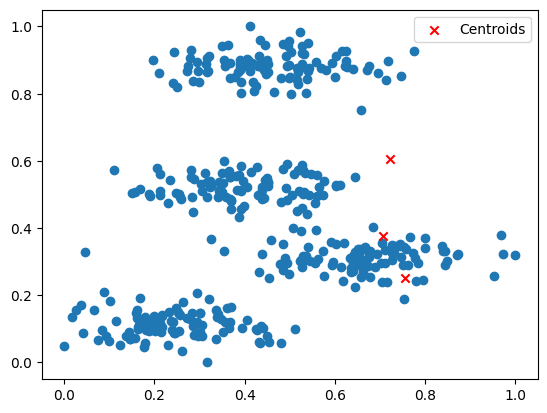

In [ ]:
random_centroids = generate_k_random_points(data, K)

plt.scatter(x1, x2)
plt.scatter(random_centroids[:, 0], 
            random_centroids[:, 1],
            color="red",
            label="Centroids",
            marker="x")
plt.legend()

In [20]:
data[1]

array([0.46621298, 0.80425669])

In [34]:
def get_distance(point1, point2):
    return np.linalg.norm(point1 - point2)

def get_closest_centroid(point, centroids):
    distances = []
    
    for c in centroids:
        distance = get_distance(point, c)
        distances.append(distance)
    
    return np.argmin(distances)

get_closest_centroid(np.array([0.2, 0.2]), random_centroids)


1

In [35]:
def get_clusters(data, centroids):
    labels = []
    
    for point in data:
        closest_index = get_closest_centroid(point, centroids)
        labels.append(closest_index)
        
    labels = np.array(labels)
    
    return labels


In [38]:
labels = get_clusters(data, random_centroids)

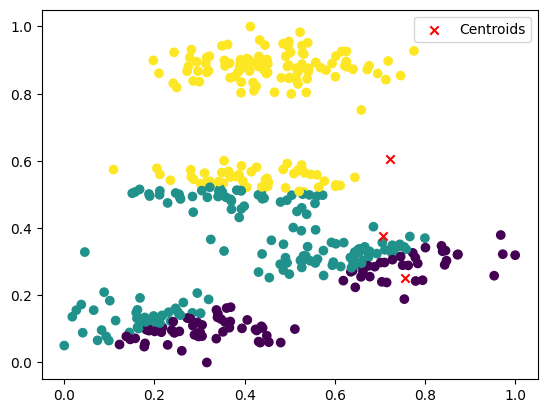

In [39]:

plt.scatter(x1, x2, c=labels)
plt.scatter(random_centroids[:, 0], 
            random_centroids[:, 1],
            color="red",
            label="Centroids",
            marker="x")
plt.legend()

In [42]:
def update_centroids(data, labels):
    new_centroids = []
    
    num_centroids = np.max(labels) + 1
    
    for c in range(num_centroids):
        points = data[labels==c]
        
        new = np.mean(points, axis=0)
        
        new_centroids.append(new)
        
    return np.array(new_centroids)

In [43]:
new_centroids = update_centroids(data, labels)

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

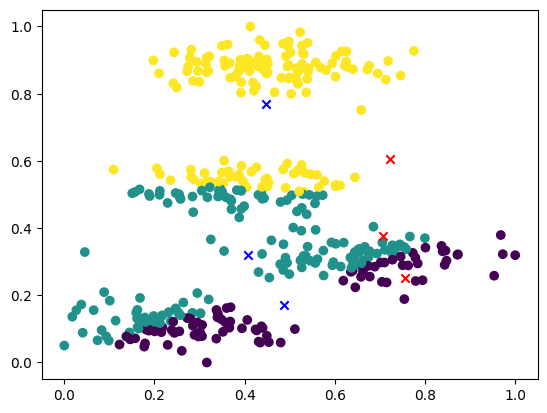

In [45]:
plt.scatter(x1, x2, c=labels)
plt.scatter(random_centroids[:, 0], random_centroids[:, 1], color='red', 
            marker='x', label='Centroids')

plt.scatter(new_centroids[:, 0], new_centroids[:, 1], color='blue', 
            marker='x', label='New Centroids')
plt.legend

In [47]:
def get_inertia(data, centroids, labels):
    inertia = 0
    
    for c in range(np.max(labels)+1):
        points = data[labels==c]
        
        centroid = centroids[c]
        inertia += np.sum((points - centroid) ** 2)
        
    return inertia

In [73]:
def kmeans(data, k, max_iter=10, tolerance=0.0000000001):
    centroids = generate_k_random_points(data, k)

    old_inertia = np.inf
    for i in range(max_iter):
        labels = get_clusters(data, centroids)
        centroids = update_centroids(data, labels)
        
        new_inertia = get_inertia(data, centroids, labels)
        
        info = f"{i+1} | Inertia = {new_inertia}"
        
        fig = plt.figure(figsize=(8, 6))
        plt.scatter(data[:, 0], data[:, 1], c=labels)
        plt.scatter(centroids[:, 0], centroids[:, 1], color='red', 
                marker='x', label='Centroids')
        plt.title(info)
        plt.legend()
        plt.show()
        plt.close(fig)
        
        print(f"{new_inertia = }")
        print(f"{old_inertia = }")
        if old_inertia - new_inertia < tolerance:
           print("Inertia stagnized") 
           break
       
        old_inertia = new_inertia
        
    return centroids, labels
        

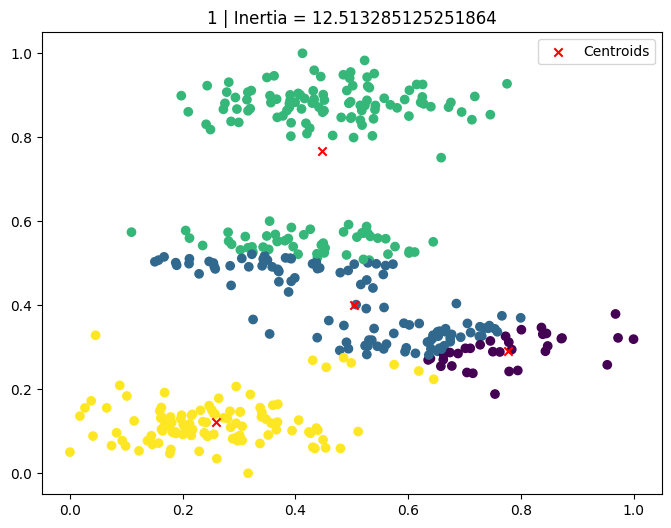

new_inertia = 12.513285125251864
old_inertia = inf


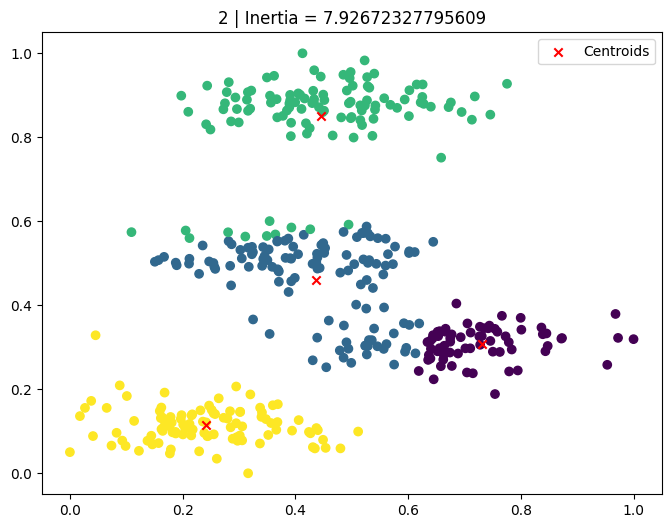

new_inertia = 7.92672327795609
old_inertia = 12.513285125251864


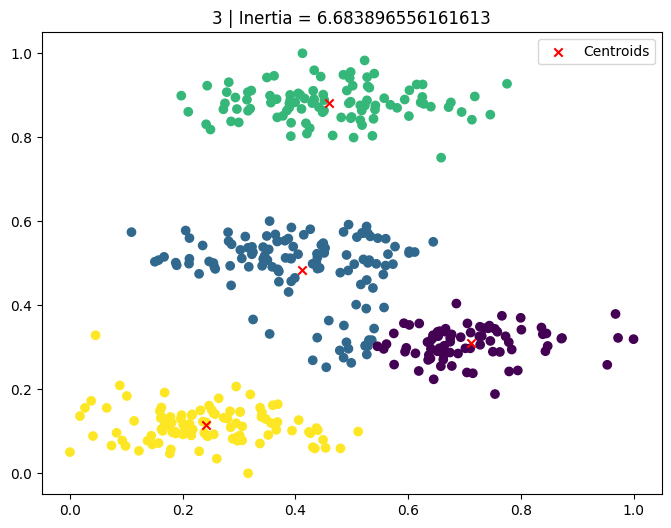

new_inertia = 6.683896556161613
old_inertia = 7.92672327795609


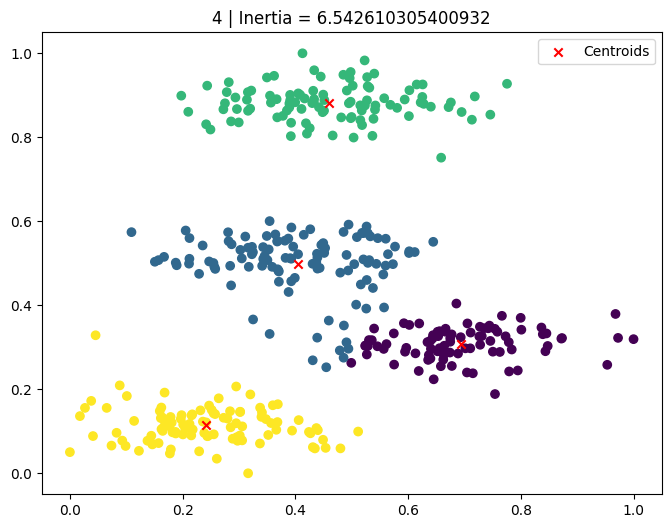

new_inertia = 6.542610305400932
old_inertia = 6.683896556161613


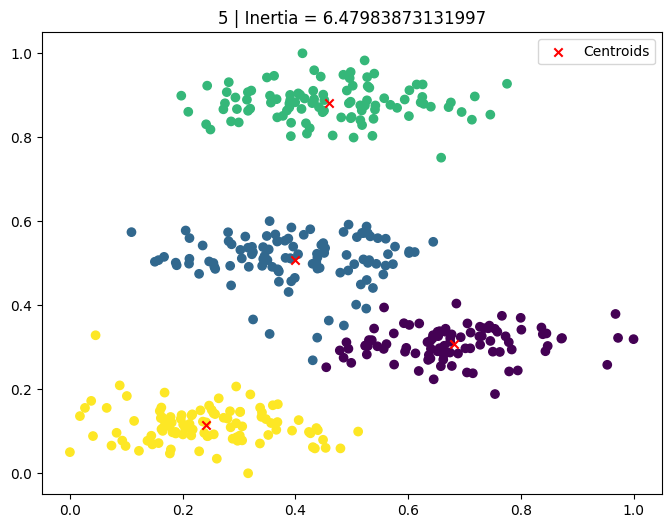

new_inertia = 6.47983873131997
old_inertia = 6.542610305400932


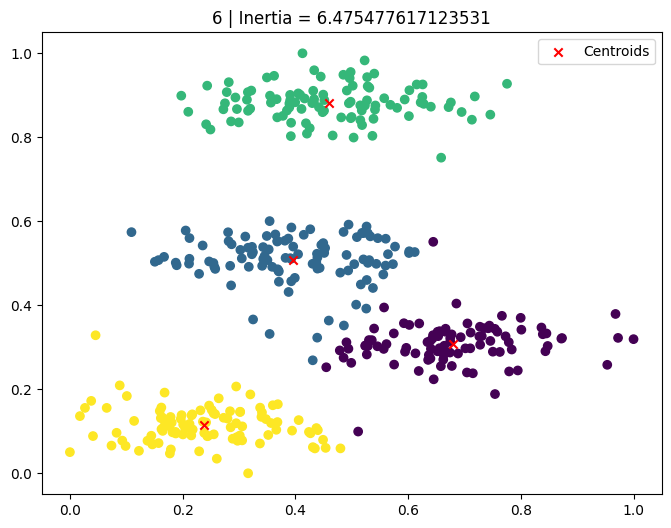

new_inertia = 6.475477617123531
old_inertia = 6.47983873131997


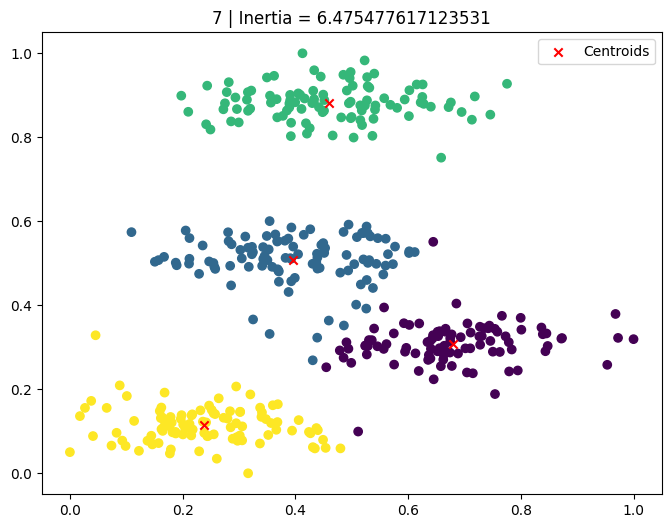

new_inertia = 6.475477617123531
old_inertia = 6.475477617123531
Inertia stagnized


(array([[0.67924499, 0.30868396],
        [0.3966174 , 0.50831579],
        [0.4599436 , 0.88174893],
        [0.23839331, 0.11417716]]),
 array([0, 2, 1, 2, 3, 3, 1, 3, 2, 0, 3, 3, 2, 3, 0, 2, 0, 1, 1, 2, 0, 1,
        2, 3, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2, 1, 3, 2, 3, 2, 3, 0, 3, 3, 2,
        2, 0, 0, 0, 1, 0, 2, 0, 1, 0, 1, 2, 2, 2, 3, 3, 2, 3, 1, 2, 1, 0,
        1, 1, 1, 0, 2, 1, 0, 2, 0, 0, 2, 3, 3, 1, 1, 2, 2, 0, 3, 3, 1, 2,
        1, 2, 1, 0, 3, 2, 3, 2, 1, 0, 1, 1, 2, 2, 3, 1, 1, 1, 0, 0, 1, 3,
        3, 3, 3, 1, 3, 1, 1, 3, 1, 0, 1, 0, 2, 3, 1, 3, 0, 3, 1, 3, 3, 2,
        3, 1, 3, 3, 0, 0, 0, 3, 1, 0, 0, 1, 1, 0, 1, 2, 2, 2, 1, 2, 3, 0,
        2, 1, 0, 3, 2, 1, 0, 2, 2, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3, 1, 2, 3,
        2, 0, 0, 0, 2, 1, 2, 2, 1, 1, 0, 0, 1, 3, 0, 0, 1, 3, 3, 3, 0, 0,
        2, 2, 1, 3, 0, 0, 1, 1, 0, 3, 3, 3, 3, 3, 0, 1, 0, 1, 2, 3, 2, 1,
        3, 1, 3, 2, 0, 1, 2, 3, 1, 2, 3, 3, 3, 2, 1, 3, 0, 1, 2, 0, 3, 2,
        1, 2, 1, 1, 3, 3, 0, 2, 0, 2, 1, 2, 1, 2

In [74]:
kmeans(data, 4)